# Plotting Multiple Data Series

Complete the following set of exercises to solidify your knowledge of plotting multiple data series with pandas, matplotlib, and seaborn. Part of the challenge that comes with plotting multiple data series is transforming the data into the form needed to visualize it like you want. For some of the exercises in this lab, you will need to transform the data into the form most appropriate for generating the visualization and then create the plot. The data can be found [here](https://drive.google.com/file/d/1tgx8nnEXLcqy1ds_99T_14-2B9TM-Gne/view?usp=sharing), please downloand and place them in your local data folder from which you can read them.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Read the data
data = pd.read_csv("../data/liquor_store_sales.csv",sep=",")
data.head()

,Year,Month,Supplier,ItemCode,Description,ItemType,RetailSales,RetailTransfers,WarehouseSales
0,2017,4,ROYAL WINE CORP,100200,GAMLA CAB - 750ML,WINE,0.0,1.0,0.0
1,2017,4,SANTA MARGHERITA USA INC,100749,SANTA MARGHERITA P/GRIG ALTO - 375ML,WINE,0.0,1.0,0.0
2,2017,4,JIM BEAM BRANDS CO,10103,KNOB CREEK BOURBON 9YR - 100P - 375ML,LIQUOR,0.0,8.0,0.0
3,2017,4,HEAVEN HILL DISTILLERIES INC,10120,J W DANT BOURBON 100P - 1.75L,LIQUOR,0.0,2.0,0.0
4,2017,4,ROYAL WINE CORP,101664,RAMON CORDOVA RIOJA - 750ML,WINE,0.0,4.0,0.0


## 1. Create a bar chart with bars for total Retail Sales, Retail Transfers, and Warehouse Sales by Item Type.

(0, 150)

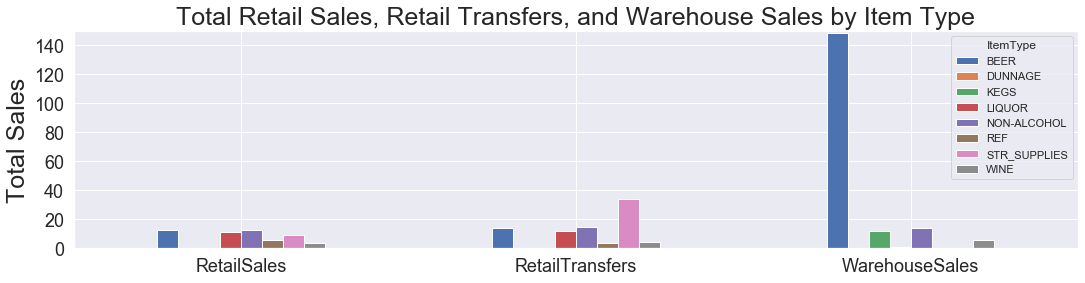

In [3]:
plot_data= pd.pivot_table(data,values=["RetailSales","RetailTransfers","WarehouseSales"],
               columns="ItemType")
sns.set(rc={'figure.figsize':(18,4)})
plot_data.head()
plot_data.plot(kind="bar")
plt.xticks(rotation=360,size=18)
plt.ylabel("Total Sales",size=25)
plt.yticks(size=18)
plt.title("Total Retail Sales, Retail Transfers, and Warehouse Sales by Item Type",size=25)
plt.ylim(0,150)
#not sure paolo what to do with negative values

## 2. Create a horizontal bar chart showing sales mix for the top 10 suppliers with the most total sales. 

In [4]:
data["TotalSales"] = data["RetailSales"]+data["WarehouseSales"]+data["RetailTransfers"]
data.head()

,Year,Month,Supplier,ItemCode,Description,ItemType,RetailSales,RetailTransfers,WarehouseSales,TotalSales
0,2017,4,ROYAL WINE CORP,100200,GAMLA CAB - 750ML,WINE,0.0,1.0,0.0,1.0
1,2017,4,SANTA MARGHERITA USA INC,100749,SANTA MARGHERITA P/GRIG ALTO - 375ML,WINE,0.0,1.0,0.0,1.0
2,2017,4,JIM BEAM BRANDS CO,10103,KNOB CREEK BOURBON 9YR - 100P - 375ML,LIQUOR,0.0,8.0,0.0,8.0
3,2017,4,HEAVEN HILL DISTILLERIES INC,10120,J W DANT BOURBON 100P - 1.75L,LIQUOR,0.0,2.0,0.0,2.0
4,2017,4,ROYAL WINE CORP,101664,RAMON CORDOVA RIOJA - 750ML,WINE,0.0,4.0,0.0,4.0


Text(0.5, 1.0, 'Top Ten Suppliers Sales')

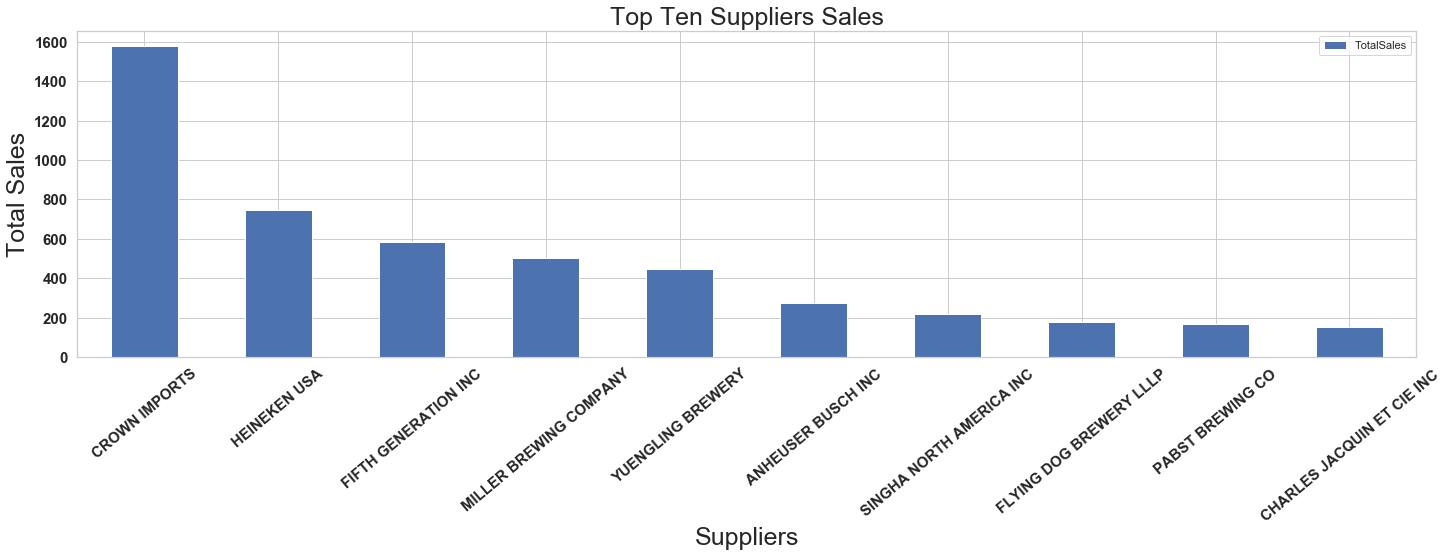

In [16]:
sns.set(style="whitegrid",palette="deep")
pd.pivot_table(data,columns="Supplier",values="TotalSales").transpose().sort_values("TotalSales",ascending=False).head(10).plot(kind='bar')
sns.set(rc={'figure.figsize':(24,6)})
plt.xticks(rotation=40,size=15,fontweight="bold")
plt.xlabel("Suppliers",size=25)
plt.ylabel("Total Sales",size=25)
plt.yticks(size=15,fontweight="bold")
plt.title("Top Ten Suppliers Sales",size=25)

## 3. Create a bar-chart chart that shows average Retail Sales, Retail Transfers, and Warehouse Sales per month over time.

Text(0.5, 1.0, 'Average Retail Sales, Retail Transfers, and Warehouse Sales per month over time')

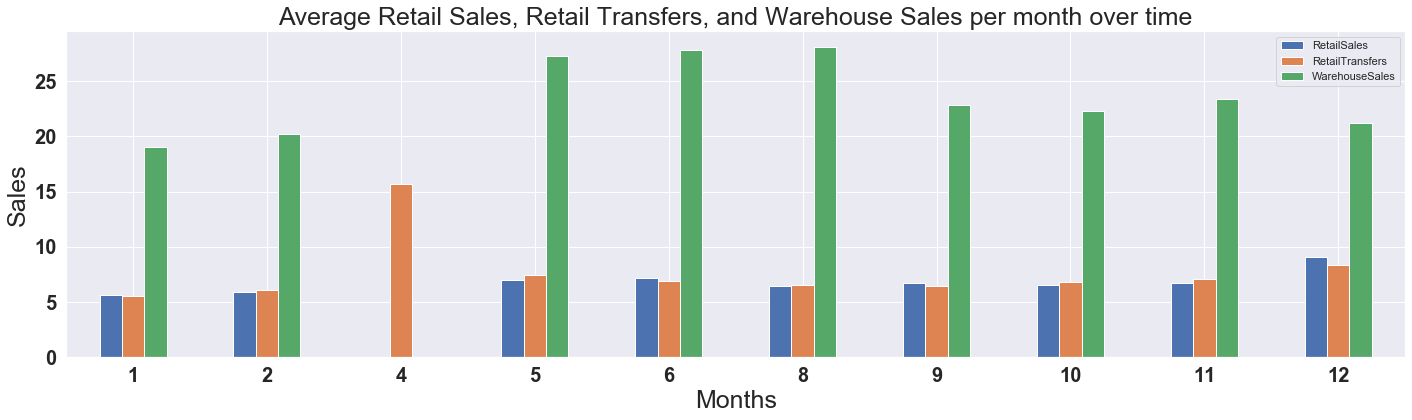

In [17]:
monthly_average= pd.pivot_table(data,columns=["Month"],
               values=["RetailSales","RetailTransfers","WarehouseSales"]).transpose()
monthly_average.plot(kind="bar", rot=0)
sns.set(rc={'figure.figsize':(24,6)})
plt.xticks(rotation=360,size=20,fontweight="bold")
plt.xlabel("Months",size=25)
plt.ylabel("Sales",size=25)
plt.yticks(size=20,fontweight="bold")
plt.title("Average Retail Sales, Retail Transfers, and Warehouse Sales per month over time",size=25)

## 4. Create a multi-line chart that shows Retail Sales summed by Item Type over time (Year & Month).

*Hint: There should be a line representing each Item Type.*

In [7]:
from datetime import date
data['Date'] = pd.to_datetime(data[['Year', 'Month']].assign(DAY=1))

Text(0.5, 1.0, 'Retail Sales summed by Item Type over time')

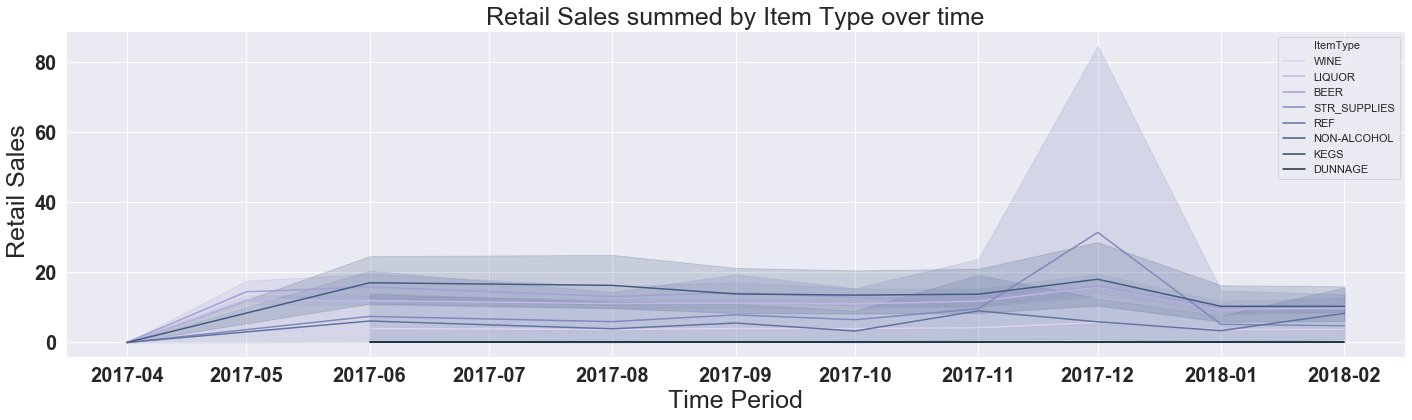

In [8]:
sns.lineplot(x="Date", y="RetailSales",hue="ItemType",
                  palette="ch:2.5,.25",
                 data=data)
plt.xticks(size=20,fontweight="bold")
plt.yticks(size=20,fontweight="bold")
plt.xlabel("Time Period",size=25)
plt.ylabel(" Retail Sales",size=25)
plt.title("Retail Sales summed by Item Type over time",size=25)


## 6. Plot the same information as above (i.e. Q5) but as a bar chart.

Text(0.5, 1.0, 'Retail Sales as per Month/Year')

<Figure size 864x432 with 0 Axes>

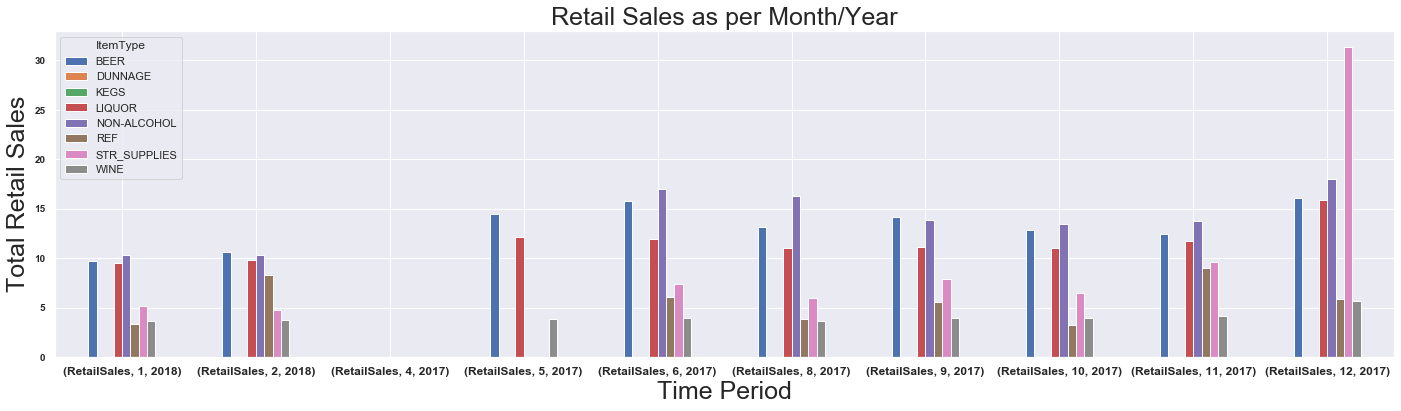

In [21]:

multiline_data=pd.pivot_table(data,columns=["Month","Year"],values=["RetailSales"],
                                  index="ItemType").transpose()
plt.figure(figsize = (12,6))
multiline_data.plot(kind="bar")
plt.xticks(rotation=360,size=12,fontweight="bold")
plt.xlabel("Time Period",size=25)
plt.ylabel("Total Retail Sales",size=25)
plt.yticks(size=10,fontweight="bold")
plt.title("Retail Sales as per Month/Year",size=25)

## 7. Create a scatter plot showing the relationship between Retail Sales (x-axis) and Retail Transfers (y-axis) with the plot points color-coded according to their Item Type.

*Hint: Seaborn's lmplot is the easiest way to generate the scatter plot.*

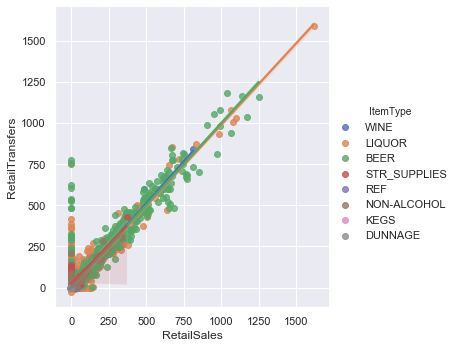

In [10]:
sns.lmplot(data=data,x="RetailSales",y="RetailTransfers",hue="ItemType")

## 8. Create a scatter matrix using all the numeric fields in the data set with the plot points color-coded by Item Type.

*Hint: Seaborn's pairplot may be your best option here.*

In [11]:
data_matrix = data[['ItemType', 'RetailSales', 'RetailTransfers', 'WarehouseSales']]
#sns.pairplot(data_matrix, hue = 'ItemType')

In [12]:
#paolo cant find a fix to the error above